<a href="https://colab.research.google.com/github/asmaradhiah/PBI/blob/main/lab3_supervised_models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lab 3 — Supervised Machine Learning Models

**Datasets:** California Housing (Regression) & PIMA Indians Diabetes (Classification)

**Goals:** Train and compare multiple supervised models including Linear Regression, Decision Trees, SVM, Random Forest,and Naive Bayes.


## 1. Setup & Imports


In [1]:
# !pip install --quiet scikit-learn pandas numpy matplotlib seaborn tensorflow

import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error #Only for Regression Problem
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.svm import SVR, SVC
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.naive_bayes import GaussianNB


## 2. Load Datasets

In [2]:
# California Housing (Regression)
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing(as_frame=True)
df_h = housing.frame.copy()
df_h.head(10)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
5,4.0368,52.0,4.761658,1.103627,413.0,2.139896,37.85,-122.25,2.697
6,3.6591,52.0,4.931907,0.951362,1094.0,2.128405,37.84,-122.25,2.992
7,3.1200,52.0,4.797527,1.061824,1157.0,1.788253,37.84,-122.25,2.414
8,2.0804,42.0,4.294118,1.117647,1206.0,2.026891,37.84,-122.26,2.267
9,3.6912,52.0,4.970588,0.990196,1551.0,2.172269,37.84,-122.25,2.611


In [3]:
df_h.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [4]:
# PIMA Indians Diabetes (Classification)
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"
cols = ["Pregnancies","Glucose","BloodPressure","SkinThickness","Insulin","BMI","DiabetesPedigreeFunction","Age","Outcome"]
df_p = pd.read_csv(url, names=cols)
df_p.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


## 3. Preprocessing

- Basic cleaning, handling zero-as-missing in PIMA, scaling, and train-test split.

In [5]:
# --- California Housing preprocessing ---
X_h = df_h.drop(columns=['MedHouseVal'])
y_h = df_h['MedHouseVal']

# Train-test split
Xh_train, Xh_test, yh_train, yh_test = train_test_split(X_h, y_h, test_size=0.25, random_state=42) #20% data for testing

# Scale features
scaler_h = StandardScaler()
Xh_train_scaled = scaler_h.fit_transform(Xh_train)
Xh_test_scaled = scaler_h.transform(Xh_test)

print('California: train shape', Xh_train.shape, 'test shape', Xh_test.shape)

California: train shape (15480, 8) test shape (5160, 8)


In [6]:
# --- PIMA preprocessing ---
df_p_clean = df_p.copy()

# In PIMA, zeros in certain columns indicate missing values
cols_missing = ['Glucose','BloodPressure','SkinThickness','Insulin','BMI']
df_p_clean[cols_missing] = df_p_clean[cols_missing].replace(0, pd.NA)

# Impute with median
for c in cols_missing:
    df_p_clean[c] = df_p_clean[c].fillna(df_p_clean[c].median())

X_p = df_p_clean.drop(columns=['Outcome'])
y_p = df_p_clean['Outcome']

Xp_train, Xp_test, yp_train, yp_test = train_test_split(X_p, y_p, test_size=0.25, random_state=42, stratify=y_p) # 80%-20%; 70%-30%; 75%-25%

# Scale features
scaler_p = StandardScaler()
Xp_train_scaled = scaler_p.fit_transform(Xp_train)
Xp_test_scaled = scaler_p.transform(Xp_test)

print('PIMA: train shape', Xp_train.shape, 'test shape', Xp_test.shape)
print('Class distribution (train):\n', yp_train.value_counts(normalize=True))

PIMA: train shape (576, 8) test shape (192, 8)
Class distribution (train):
 Outcome
0    0.651042
1    0.348958
Name: proportion, dtype: float64


## 4. Regression Models (California Housing)
Models: Linear Regression, Decision Tree, Random Forest, SVR

Evaluation: RMSE, MAE, R²

In [7]:
def regression_metrics(y_true, y_pred):
    rmse = mean_squared_error(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    return {'RMSE': rmse, 'MAE': mae, 'R2': r2}

results_reg = {}

In [8]:
# 4.1 Linear Regression
lr = LinearRegression()
lr.fit(Xh_train_scaled, yh_train)
y_lr = lr.predict(Xh_test_scaled)
results_reg['LinearRegression'] = regression_metrics(yh_test, y_lr)
results_reg['LinearRegression']

{'RMSE': 0.5411287478470689,
 'MAE': 0.5296964012919462,
 'R2': 0.5910509795491351}

In [9]:
# 4.2 Decision Tree Regressor
dtr = DecisionTreeRegressor(max_depth=6, random_state=42)
dtr.fit(Xh_train_scaled, yh_train)
y_dtr = dtr.predict(Xh_test_scaled)
results_reg['DecisionTreeRegressor'] = regression_metrics(yh_test, y_dtr)
results_reg['DecisionTreeRegressor']

{'RMSE': 0.4830647846729983, 'MAE': 0.4994617204404502, 'R2': 0.63493185070596}

In [10]:
# 4.3 Random Forest Regressor
rfr = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42)
rfr.fit(Xh_train_scaled, yh_train)
y_rfr = rfr.predict(Xh_test_scaled)
results_reg['RandomForestRegressor'] = regression_metrics(yh_test, y_rfr)
results_reg['RandomForestRegressor']

{'RMSE': 0.2910453048064824,
 'MAE': 0.36456099903102396,
 'R2': 0.7800473680598614}

In [11]:
# 4.4 Support Vector Regressor (SVR)
# Note: SVR can be slow on large datasets; we demonstrate on a subset for speed.
svr = SVR(C=0.2, kernel='rbf')
svr.fit(Xh_train_scaled[:2000], yh_train[:2000])
y_svr = svr.predict(Xh_test_scaled)
results_reg['SVR_subset_fit'] = regression_metrics(yh_test, y_svr)
results_reg['SVR_subset_fit']

{'RMSE': 0.46450187434709483,
 'MAE': 0.46461700851643273,
 'R2': 0.6489604603939467}

In [12]:
# Show regression results
pd.DataFrame(results_reg).T

,RMSE,MAE,R2
LinearRegression,0.541129,0.529696,0.591051
DecisionTreeRegressor,0.483065,0.499462,0.634932
RandomForestRegressor,0.291045,0.364561,0.780047
SVR_subset_fit,0.464502,0.464617,0.648960


### Regression: Predicted Values (Random Forest & DTR)

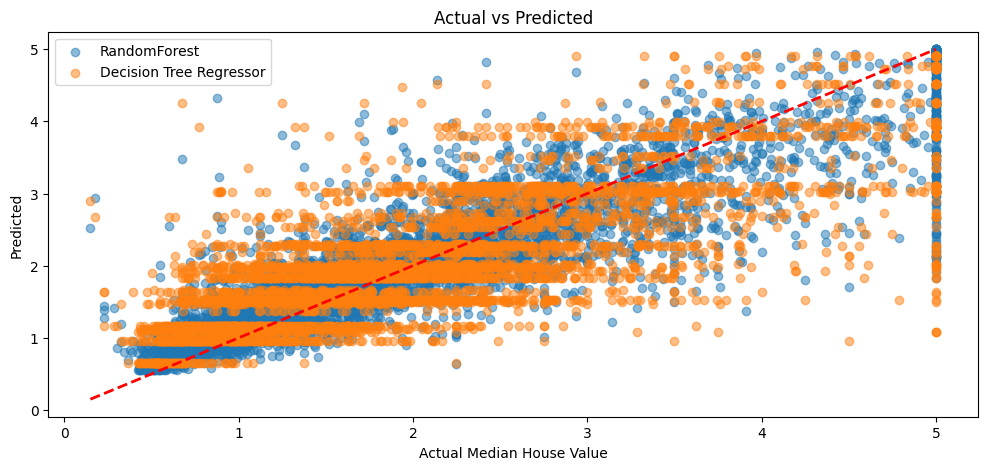

In [13]:
plt.figure(figsize=(12,5))
plt.scatter(yh_test, y_rfr, alpha=0.5, label='RandomForest')
plt.scatter(yh_test, y_dtr, alpha=0.5, label='Decision Tree Regressor')
plt.plot([yh_test.min(), yh_test.max()], [yh_test.min(), yh_test.max()], 'r--', lw=2)
plt.xlabel('Actual Median House Value')
plt.ylabel('Predicted')
plt.legend()
plt.title('Actual vs Predicted')
plt.show()

## 5. Classification Models (PIMA Indians Diabetes)
Models: Logistic Regression, Decision Tree, Random Forest, SVM, Naive Bayes

Evaluation: Accuracy, Precision, Recall, F1, ROC-AUC

In [14]:
results_clf = {}

In [15]:
# 5.1 Logistic Regression
logr = LogisticRegression(max_iter=1000)
logr.fit(Xp_train_scaled, yp_train)
yp_lr = logr.predict(Xp_test_scaled)
results_clf['LogisticRegression'] = {
    'accuracy': accuracy_score(yp_test, yp_lr),
    'roc_auc': roc_auc_score(yp_test, logr.predict_proba(Xp_test_scaled)[:,1])
}
results_clf['LogisticRegression']

{'accuracy': 0.7291666666666666, 'roc_auc': np.float64(0.8238805970149253)}

In [16]:
# 5.2 Decision Tree Classifier
dtc = DecisionTreeClassifier(max_depth=6, random_state=42)
dtc.fit(Xp_train_scaled, yp_train)
yp_dtc = dtc.predict(Xp_test_scaled)
results_clf['DecisionTree'] = {
    'accuracy': accuracy_score(yp_test, yp_dtc),
    'roc_auc': roc_auc_score(yp_test, dtc.predict_proba(Xp_test_scaled)[:,1])
}
results_clf['DecisionTree']

{'accuracy': 0.75, 'roc_auc': np.float64(0.6850149253731344)}

In [17]:
# 5.3 Random Forest Classifier
rfc = RandomForestClassifier(n_estimators=200, max_depth=8, random_state=42)
rfc.fit(Xp_train_scaled, yp_train)
yp_rfc = rfc.predict(Xp_test_scaled)
results_clf['RandomForest'] = {
    'accuracy': accuracy_score(yp_test, yp_rfc),
    'roc_auc': roc_auc_score(yp_test, rfc.predict_proba(Xp_test_scaled)[:,1])
}
results_clf['RandomForest']

{'accuracy': 0.75, 'roc_auc': np.float64(0.8095522388059702)}

In [18]:
# 5.4 SVM (with probability for ROC)
svc = SVC(kernel='rbf', probability=True)
svc.fit(Xp_train_scaled, yp_train)
yp_svc = svc.predict(Xp_test_scaled)
results_clf['SVM'] = {
    'accuracy': accuracy_score(yp_test, yp_svc),
    'roc_auc': roc_auc_score(yp_test, svc.predict_proba(Xp_test_scaled)[:,1])
}
results_clf['SVM']

{'accuracy': 0.7395833333333334, 'roc_auc': np.float64(0.7942686567164179)}

In [19]:
# 5.5 Gaussian Naive Bayes
gnb = GaussianNB()
gnb.fit(Xp_train_scaled, yp_train)
yp_gnb = gnb.predict(Xp_test_scaled)
results_clf['GaussianNB'] = {
    'accuracy': accuracy_score(yp_test, yp_gnb),
    'roc_auc': roc_auc_score(yp_test, gnb.predict_proba(Xp_test_scaled)[:,1])
}
results_clf['GaussianNB']

{'accuracy': 0.7239583333333334, 'roc_auc': np.float64(0.7800597014925373)}

In [20]:
# Show classification results
pd.DataFrame(results_clf).T

,accuracy,roc_auc
LogisticRegression,0.729167,0.823881
DecisionTree,0.750000,0.685015
RandomForest,0.750000,0.809552
SVM,0.739583,0.794269
GaussianNB,0.723958,0.780060


### ROC Curves

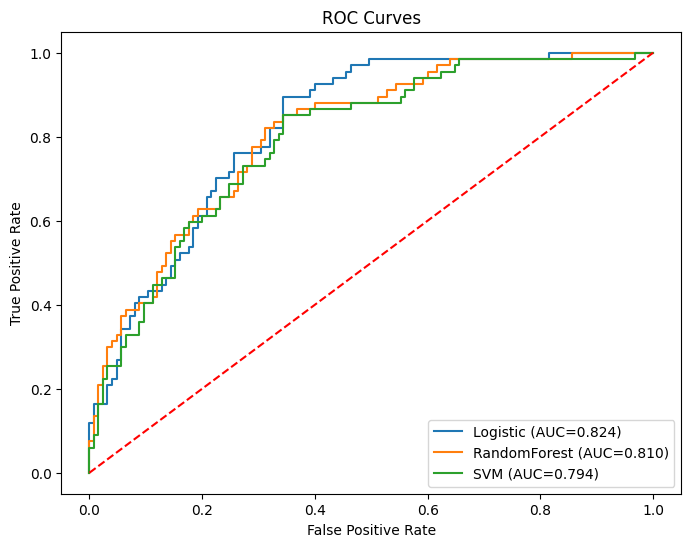

In [21]:
plt.figure(figsize=(8,6))
models_for_roc = {
    'Logistic': (logr, Xp_test_scaled),
    'RandomForest': (rfc, Xp_test_scaled),
    'SVM': (svc, Xp_test_scaled)
}

for name, (m, Xtest) in models_for_roc.items():
    if name == 'Keras':
        probs = model_clf.predict(Xtest).ravel()
    else:
        probs = m.predict_proba(Xtest)[:,1]
    fpr, tpr, _ = roc_curve(yp_test, probs)
    auc = roc_auc_score(yp_test, probs)
    plt.plot(fpr, tpr, label=f"{name} (AUC={auc:.3f})")

plt.plot([0,1],[0,1], 'r--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves')
plt.legend()
plt.show()

## 6. Model Comparison & Reflection

Compare the tables above. Discuss bias-variance, model strengths, and next steps (hyperparameter tuning, cross-validation, ensembling).

Ans: The comparison of these classification models reveals a classic bias-variance tradeoff where Logistic Regression achieves the highest ROC-AUC ($0.824$), indicating strong discriminative power (low variance/high bias), while the Decision Tree and Random Forest models lead in raw accuracy ($0.750$). The Decision Tree's significantly lower ROC-AUC ($0.685$) suggests it is suffering from high variance and overfitting the training data, whereas the Random Forest successfully mitigates this through ensembling to maintain a high AUC ($0.810$). SVM and Gaussian Naive Bayes provide stable mid-range performance, but the overall results suggest that the dataset benefits from the linear stability of Logistic Regression or the complexity-reduction of Random Forest. To further improve these outcomes, the next logical steps involve implementing k-fold cross-validation to ensure result stability, performing hyperparameter tuning via GridSearchCV to optimize the Random Forest and SVM parameters, and exploring ensembling techniques like a VotingClassifier to combine the strengths of the top-performing models.

## 7. Exercises for Students

1. Use GridSearchCV to tune RandomForest hyperparameters for PIMA dataset and report best params.

2. For California Housing, try ElasticNet regression and compare RMSE with Linear Regression.

3. Modify the Keras classification network (add/remove layers, change activation) and comment on performance.

4. Plot feature importances for the Random Forest regression model and report top 5 features.

In [23]:
#7.1 GridSearchCV for Random Forest (PIMA)
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'criterion': ['gini', 'entropy']
}

# Initialize GridSearchCV
rfc_tuned = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(estimator=rfc_tuned, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Fit on PIMA training data
grid_search.fit(Xp_train_scaled, yp_train)

print(f"Best Parameters: {grid_search.best_params_}")
print(f"Best Accuracy: {grid_search.best_score_:.4f}")

Best Parameters: {'criterion': 'entropy', 'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 50}
Best Accuracy: 0.7727


In [24]:
#7.2 ElasticNet vs. Linear Regression (California Housing)
from sklearn.linear_model import ElasticNet

# 1. Linear Regression (Baseline from your results was RMSE ~0.54)
lr = LinearRegression()
lr.fit(Xh_train_scaled, yh_train)
y_lr = lr.predict(Xh_test_scaled)
rmse_lr = np.sqrt(mean_squared_error(yh_test, y_lr))

# 2. ElasticNet
en = ElasticNet(alpha=0.1, l1_ratio=0.5, random_state=42)
en.fit(Xh_train_scaled, yh_train)
y_en = en.predict(Xh_test_scaled)
rmse_en = np.sqrt(mean_squared_error(yh_test, y_en))

print(f"Linear Regression RMSE: {rmse_lr:.4f}")
print(f"ElasticNet RMSE: {rmse_en:.4f}")

Linear Regression RMSE: 0.7356
ElasticNet RMSE: 0.7920


In [25]:
#7.3 3. Modify Keras Network (PIMA Classification)
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

# Modified Architecture
model_clf = Sequential([
    Dense(16, activation='relu', input_shape=(Xp_train_scaled.shape[1],)), # Increased units
    Dropout(0.2),                                                        # Added Dropout
    Dense(8, activation='relu'),                                         # Added extra layer
    Dense(1, activation='sigmoid')                                        # Output
])

model_clf.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train
history = model_clf.fit(Xp_train_scaled, yp_train, epochs=50, batch_size=10,
                    validation_data=(Xp_test_scaled, yp_test), verbose=0)

print(f"Final Validation Accuracy: {history.history['val_accuracy'][-1]:.4f}")

Final Validation Accuracy: 0.7135


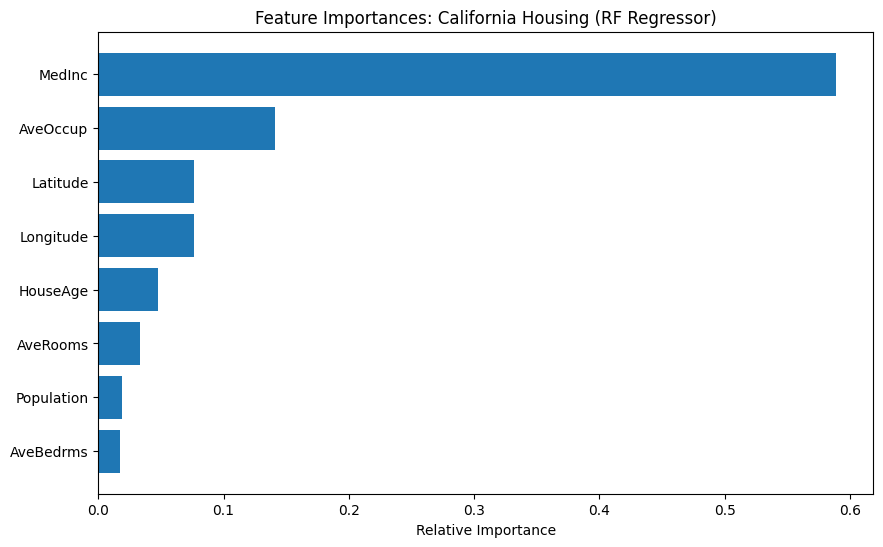

Top 5 Features: ['MedInc', 'AveOccup', 'Latitude', 'Longitude', 'HouseAge']


In [26]:
#7.4 Plot Feature Importances (Random Forest Regressor) Get feature names and importances
features = X_h.columns
importances = rfr.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(10,6))
plt.title('Feature Importances: California Housing (RF Regressor)')
plt.barh(range(len(indices)), importances[indices], align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

# Report Top 5
top_5 = [features[i] for i in indices[-5:][::-1]]
print(f"Top 5 Features: {top_5}")

done